# Functions and Visualizations


In [1]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from gofer.ok import check

In [2]:
raw_compensation = Table.read_table('raw_compensation.csv')
raw_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256


In [3]:
total_pay_type = type(raw_compensation.column("Total Pay").item(0))
total_pay_type

str

In [4]:
mark_hurd_pay_string = raw_compensation.column('Total Pay').item(0)
mark_hurd_pay_string

'$53.25 '

In [5]:
mark_hurd_pay = float(mark_hurd_pay_string.strip("$"))*1000000
mark_hurd_pay

53250000.0

In [6]:
def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""  
    return float(pay_string.strip("$"))*1000000

In [7]:
convert_pay_string_to_number('$42')

42000000.0

In [8]:
convert_pay_string_to_number(mark_hurd_pay_string)

53250000.0

In [9]:
# We can also compute Safra Catz's pay in the same way:
convert_pay_string_to_number(raw_compensation.where("Name", are.containing("Safra")).column("Total Pay").item(0))

53240000.0

In [10]:
_ = interact(convert_pay_string_to_number, pay_string='$42')

interactive(children=(Text(value='$42', description='pay_string'), Output()), _dom_classes=('widget-interact',…

In [11]:
def to_percentage(proportion):
    """ converts a proportion to a percentage. """
    factor = 100
    return proportion * factor

twenty_percent = to_percentage (0.2)
twenty_percent

20.0

In [12]:
a_proportion = 2**(.5) / 2
a_percentage = a_proportion * 100
a_percentage

70.71067811865476

In [13]:
def disemvowel(a_string):
    return a_string.replace("a","").replace("e","").replace("i","").replace("o","").replace("u","")
disemvowel
# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

In [14]:
# Alternatively, you can use interact to call your function
_ = interact(disemvowel, a_string='Hello world')

interactive(children=(Text(value='Hello world', description='a_string'), Output()), _dom_classes=('widget-inte…

In [15]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    return len(disemvowel(a_string))
num_non_vowels("Go bears!")
# Try calling your function yourself to make sure the output is what
# you expect. You can also use the interact function if you'd like.

6

In [16]:
movies_by_year = Table.read_table("movies_by_year.csv")
rank = 5
fifth_from_top_movie_year = movies_by_year.sort("Total Gross", descending=True).column("Year").item(rank-1)
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was: 2010


In [17]:
def print_kth_top_movie_year(k):
    # Our solution used 2 lines.
   top_year = movies_by_year.sort("Total Gross", descending=True).column("Year").item(k-1)
   print("Year number", k, "for total gross movie sales was:", top_year)
# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)



Year number 2 for total gross movie sales was: 2013
Year number 3 for total gross movie sales was: 2012


In [18]:
# interact also allows you to pass in an array for a function argument. It will
# then present a dropdown menu of options.
_ = interact(print_kth_top_movie_year, k=np.arange(1, 10))

interactive(children=(Dropdown(description='k', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Output()), _dom…

In [19]:
def print_number_five():
   
    print(5)

In [20]:
print_number_five()

5


In [21]:
our_name_for_max = max
our_name_for_max(2, 6)

6

In [22]:
max(2, 6)

6

In [23]:
max

<function max>

In [24]:
make_array(max, np.average, are.equal_to)

array([<built-in function max>, <function average at 0x7f422c042680>,
       <function are.equal_to at 0x7f41f73087a0>], dtype=object)

In [25]:
some_functions = make_array(max,np.average,are.equal_to)
some_functions

array([<built-in function max>, <function average at 0x7f422c042680>,
       <function are.equal_to at 0x7f41f73087a0>], dtype=object)

In [26]:
make_array(max, np.average, are.equal_to).item(0)(4, -2, 7)

7

In [27]:
pay = raw_compensation.apply(convert_pay_string_to_number, "Total Pay")
pay

array([5.325e+07, 5.324e+07, 4.491e+07, 3.598e+07, 3.336e+07, 2.484e+07,
       2.204e+07, 1.986e+07, 1.962e+07, 1.932e+07, 1.876e+07, 1.861e+07,
       1.836e+07, 1.809e+07, 1.710e+07, 1.663e+07, 1.633e+07, 1.614e+07,
       1.610e+07, 1.602e+07, 1.510e+07, 1.498e+07, 1.463e+07, 1.451e+07,
       1.444e+07, 1.436e+07, 1.431e+07, 1.409e+07, 1.400e+07, 1.367e+07,
       1.234e+07, 1.220e+07, 1.218e+07, 1.213e+07, 1.205e+07, 1.184e+07,
       1.171e+07, 1.163e+07, 1.116e+07, 1.111e+07, 1.111e+07, 1.073e+07,
       1.050e+07, 1.043e+07, 1.037e+07, 1.028e+07, 1.027e+07, 1.018e+07,
       1.016e+07, 9.970e+06, 9.960e+06, 9.860e+06, 9.740e+06, 9.420e+06,
       9.390e+06, 9.220e+06, 9.060e+06, 9.030e+06, 8.860e+06, 8.760e+06,
       8.570e+06, 8.380e+06, 8.360e+06, 8.350e+06, 8.230e+06, 7.860e+06,
       7.700e+06, 7.580e+06, 7.510e+06, 7.230e+06, 7.210e+06, 7.120e+06,
       6.880e+06, 6.770e+06, 6.640e+06, 6.560e+06, 6.140e+06, 5.920e+06,
       5.900e+06, 5.890e+06, 5.730e+06, 5.420e+06, 

In [28]:
compensation = raw_compensation.with_column(
    "Total Pay ($)",
    pay)
compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($)
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362,5.325e+07
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362,5.324e+07
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,4.491e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,3.598e+07
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,3.336e+07
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,2.484e+07
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,2.204e+07
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,1.986e+07
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,1.962e+07
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,1.932e+07


In [29]:
average_total_pay = np.average(pay)
average_total_pay

11445294.11764706

In [30]:
cash_proportion = raw_compensation.apply(convert_pay_string_to_number, "Cash Pay")/pay
cash_proportion

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.01784038, 0.01784373, 0.55421955, 0.02779322, 0.13938849,
       0.48711755, 0.19555354, 0.12437059, 0.25993884, 0.35196687,
       0.3075693 , 0.22138635, 0.13126362, 0.1708126 , 0.23099415,
       0.06734817, 0.13043478, 0.28004957, 0.33229814, 0.15355805,
       0.29337748, 0.21829105, 0.31100478, 0.25086147, 0.2299169 ,
       0.16991643, 0.31795947, 0.26188786, 0.28357143, 0.15654718,
       0.38168558, 0.28934426, 0.20361248, 0.47650453, 0.45643154,
       0.36402027, 0.2177626 , 0.24763543, 0.42562724, 0.2610261 ,
       0.18361836, 0.1444548 , 0.33333333, 0.10834132, 0.20925747,
       0.97276265, 0.22979552, 0.22789784, 0.37893701, 0.25175527,
       0.73895582, 0.37018256, 0.2412731 , 0.2133758 , 0.20553781,
       0.23318872, 0.33664459, 0.3875969 , 0.56094808, 0.11757991,
       0.35239207, 0.24463007, 0.25      , 0.23712575, 0.43377886,
       0.31424936, 0.46363636, 0.32585752, 0.24766977, 0.98755187,
       0.27184466, 0.96207865, 0.31831395, 0.81979321, 0.23795

In [31]:
# Definition to turn percent to number
def percent_string_to_num(percent_string):
    return float(percent_string.strip("%"))

# Compensation table where there is a previous year
having_previous_year = compensation.where("% Change", are.not_equal_to("(No previous year)"))

# Get the percent changes as numbers instead of strings
percent_changes = having_previous_year.apply(percent_string_to_num,"% Change")

# Calculate the previous years pay
previous_pay = having_previous_year.column("Total Pay ($)")/(1+percent_changes/100)

# Put the previous pay column into the compensation table
with_previous_compensation = having_previous_year.with_column("2014 Total Pay ($)",previous_pay)

with_previous_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($),2014 Total Pay ($)
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,4.491e+07,4.6299e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,3.598e+07,4.23294e+07
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,3.336e+07,3.97143e+07
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,2.484e+07,2.5875e+07
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,2.204e+07,2.59294e+07
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,1.986e+07,1.56378e+07
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,1.962e+07,1.64874e+07
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,1.932e+07,2.14667e+07
11,John C. Martin**,Gilead Sciences (Foster City),$18.76,-1%,$5.77,$12.98,$0.01,117,1.876e+07,1.89495e+07
13,Shantanu Narayen,Adobe Systems (San Jose),$18.36,3%,$2.41,$15.85,$0.09,125,1.836e+07,1.78252e+07


In [32]:
average_pay_2014 = np.average(having_previous_year.column("Total Pay ($)")/(1+percent_changes/100))
average_pay_2014

11649176.115603436

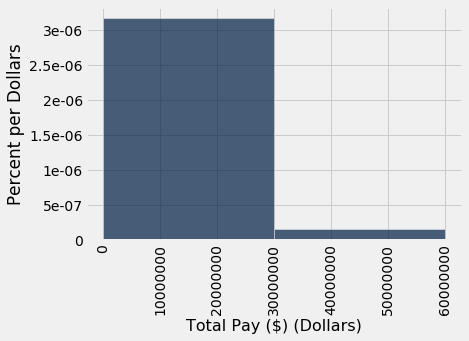

In [33]:
uneven = make_array(0,30000000,60000000)
compensation.hist("Total Pay ($)",bins=uneven,unit="Dollars")

In [34]:
compensation_table = compensation.bin("Total Pay ($)",bins=uneven)
compensation_table

bin,Total Pay ($) count
0,97
30000000,5
60000000,0


In [35]:
num_ceos_more_than_30_million = 5
num_ceos_more_than_30_million

5

In [36]:
num_ceos_more_than_30_million_2 = compensation_table.where('bin',are.above(29999999)).column("Total Pay ($) count").item(0)
num_ceos_more_than_30_million_2

5